   CO(GT)  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  NO2(GT)  \
0     2.6      1360.00  11.881723        1045.50    166.0    113.0   
1     2.0      1292.25   9.397165         954.75    103.0     92.0   
2     2.2      1402.00   8.997817         939.25    131.0    114.0   
3     2.2      1375.50   9.228796         948.25    172.0    122.0   
4     1.6      1272.25   6.518224         835.50    131.0    116.0   

   PT08.S4(NO2)  PT08.S5(O3)   DateInt  hour  week  month  
0       1692.00      1267.50  20040310    18    11      3  
1       1558.75       972.25  20040310    19    11      3  
2       1554.50      1074.00  20040310    20    11      3  
3       1583.75      1203.25  20040310    21    11      3  
4       1490.00      1110.00  20040310    22    11      3  


"\nimport seaborn as sns\n#sns.boxplot(data['NOx(GT)'])\n\nboxplot = data.boxplot()#(column=['NOx(GT)', 'CO(GT)', 'PT08.S1(CO)'])\n#boxplot = data.boxplot()(column=['NOx(GT)','CO(GT)'])\n\nQ1 = df.quantile(0.25)\nQ3 = df.quantile(0.75)\nIQR = Q3 - Q1\nprint(IQR)\n"

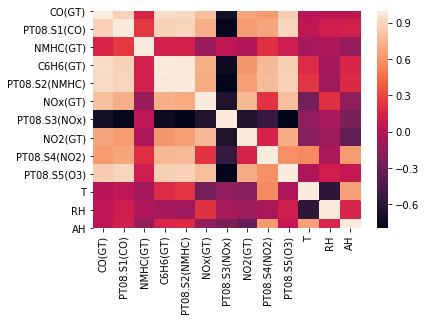

In [275]:
#q2

import pandas as pd
import datetime
import numpy as np
import seaborn as sns
df = pd.read_excel('Desktop/Machine Learning/AirQuality.xlsx', na_values = '-200.0')

#create some new date-time features
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)

df['DateInt'] = pd.to_datetime(df['Date']).dt.strftime('%Y%m%d').astype(int)
df['hour'] =pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df['week'] = df['Date'].dt.week
df['month'] = df['Date'].dt.month


#df = df.drop(['Date', 'Time','NMHC(GT)','PT08.S4(NO2)','PT08.S3(NOx)','PT08.S5(O3)','C6H6(GT)'], axis=1)
df = df.drop(['Date', 'Time','T','RH','AH','PT08.S3(NOx)','NMHC(GT)'], axis=1)



#df[df < 0] = df.mean()
df.fillna(df.mean(), inplace=True)
dfy = df.drop(['CO(GT)','hour','week','month','DateInt'],axis=1)

print(df.head(5))

#print(df.describe())


#corr = df.corr()
#print(corr)
#sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)

#sns.pairplot(df)

'''
#data.plot()
df.reset_index().plot.scatter(x = 'index', y = 'CO(GT)')
df.reset_index().plot.scatter(x = 'index', y = 'PT08.S1(CO)')
df.reset_index().plot.scatter(x = 'index', y = 'PT08.S1(CO)')
df.reset_index().plot.scatter(x = 'index', y = 'C6H6(GT)')
df.reset_index().plot.scatter(x = 'index', y = 'PT08.S2(NMHC)')
df.reset_index().plot.scatter(x = 'index', y = 'NOx(GT)')
df.reset_index().plot.scatter(x = 'index', y = 'PT08.S3(NOx)')
df.reset_index().plot.scatter(x = 'index', y = 'PT08.S4(NO2)')
df.reset_index().plot.scatter(x = 'index', y = 'NO2(GT)')
df.reset_index().plot.scatter(x = 'index', y = 'PT08.S5(O3)')
df.reset_index().plot.scatter(x = 'index', y = 'T')
df.reset_index().plot.scatter(x = 'index', y = 'RH')
df.reset_index().plot.scatter(x = 'index', y = 'AH')
'''

'''
import seaborn as sns
#sns.boxplot(data['NOx(GT)'])

boxplot = data.boxplot()#(column=['NOx(GT)', 'CO(GT)', 'PT08.S1(CO)'])
#boxplot = data.boxplot()(column=['NOx(GT)','CO(GT)'])

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
'''



In [276]:
#Simple Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
import math

y = df[['CO(GT)']]#.values.reshape(-1,1)
X = dfy#.iloc[:,:].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=42)

reg = LinearRegression().fit(X_train,y_train)
print ('score= ',reg.score(X_test,y_test))
print ('slope= ',reg.coef_)
p = reg.predict(X_test)
print( 'rms= ',math.sqrt(mean_squared_error(y_test, p)))
print('r2: ', r2_score(y_test, p))


score=  0.7885529009455291
slope=  [[ 0.00094922  0.13326161 -0.00197388  0.00270604  0.0042115   0.00060081
  -0.00041173]]
rms=  0.6101576938632861
r2:  0.7885529009455291


In [277]:
#simple Linear Regression with Stochastic Gradient Descent

import numpy as np
from sklearn import linear_model

clf = linear_model.SGDRegressor(max_iter=50000,tol= 0.00001,learning_rate ='constant',eta0 = 0.000000001)
clf.fit(X_train,y_train)
print ('score= ',clf.score(X_test,y_test))
print ('slope= ',clf.coef_)
g = clf.predict(X_test)
print( 'rms= ',math.sqrt(mean_squared_error(y_test, g)))
print('r2: ', r2_score(y_test,g))

score=  0.7325002373952301
slope=  [-0.00112991  0.00023691  0.00183124  0.00338449  0.00015399  0.00025929
  0.00043187]
rms=  0.6862825033811631
r2:  0.7325002373952302


/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(9357, 1)
(9357, 7)
[[-0.06050408]
 [ 0.98537834]
 [-0.01760226]
 [ 0.04919626]
 [ 0.73456383]
 [ 0.0449023 ]
 [-0.08218222]]
cost:  372.3786270876868


Text(0, 0.5, 'Cost')

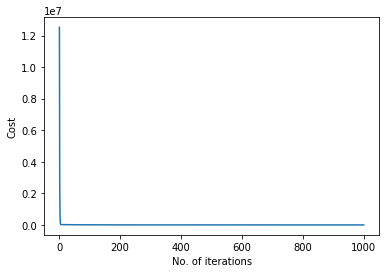

In [288]:
# Linear Regression with Gradient Descent

y = df[['CO(GT)']].values.reshape(-1,1)
x = dfy.iloc[:,0:].values.reshape(-1,7)

print (y.shape)
print (x.shape)
cost = np.ones(1000)

def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y 
        cost[i] = np.sum(loss ** 2) / (2 * m)
        #print("Iteration %d | Cost: %f" % (i, cost[i]))
        gradient = np.dot(xTrans, loss) / m 
        theta = theta - alpha * gradient
    return theta

print(gradientDescent(x,y,np.ones((7,1)),0.0000001,9357,1000))
print ('cost: ',cost[999])
import matplotlib.pyplot as plt
cost = list(cost)
n_iterations = [x for x in range(1,1001)]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')


In [1]:
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h

def BGD(theta, alpha, num_iters, h, X, y, n):
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) *  sum((h-y) * X.transpose()[j])
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
    theta = theta.reshape(1,n+1)
    return theta, cost

def linear_regression(X, y, alpha, num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    print (X.shape)
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    print(theta.shape)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    theta, cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, cost

print (y.shape[0])
print (x.shape[1])
theta, cost = linear_regression(x, y, 0.0001, 1000)

NameError: name 'y' is not defined